## Analisis de la calibracion

El archivo de calibración definitiva encontró unos parámetros de ajuste con un error elevad y con unos parámetros que no pueden ser físicos (p2 del polarizador negativo, por ejemplo). Este archivo busca encontrar el error para su subsanación.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from __future__ import print_function, division

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import time
import datetime
import pprint
from math import sqrt, pi

from scipy.io import savemat, loadmat
from scipy.special import erf
from scipy import optimize
from phyton_optics import degrees

import phyton_optics.polarization_jones as pj
import phyton_optics.polarization_stokes as ps
import phyton_optics.polarization_mueller_analysis as amm

from polarimeter.polarimeter import Intensity_Rotating_Elements

import polarimeter.polarimeter as opsys
import numpy as np
import os

from polarimeter.utils import dibujar_2d_fitting, plot_2d, plot_experiment_residuals_1D

print('Carga de modulos finalizada')

C:\Users\Jesus\Anaconda2\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


**Cargar datos**

Cargar los datos guardados en los archivos y realizar algunos cálculos para eliminar ruido, por ejemplo.

In [26]:
# Calibracion dia 19
# Load file
filename = 'Paso_4_2018-12-19.npz'
data = np.load(filename)
# Rename variables
Iindividual = data['Iindividual']
Naverage = data['Naverage']
# Make stadistics
ratio_individual = Iindividual[:,0] / Iindividual[:,1]
mean = np.mean(Iindividual, axis=0)
mean_phd2 = np.mean(Iindividual[:,1])

# Load file
filename = 'Paso_5_2018-12-19.npz'
data = np.load(filename)
# Rename variables
angle1 = data['angle1']
Intensity_Paso5 = data['intensity1']
#Intensity_Paso5 = Intensity_Paso5[:,0] * Intensity_Paso5[:,1]/mean_phd2

# Load file
filename = 'Paso_6_2018-12-19.npz'
data = np.load(filename)
# Rename variables
Intensity_Paso6 = data['intensity1']
#Intensity_Paso6 = Intensity_Paso6[:,0] * Intensity_Paso6[:,1]/mean_phd2

# Load file
filename = 'Paso_7_2018-12-19.npz'
data = np.load(filename)
# Rename variables
angles2x = data['angle2x']
angles2y = data['angle2y']
Intensity_Paso7 = data['intensity2']
#Intensity_Paso7 = Intensity_Paso7[:,0] * Intensity_Paso7[:,1]/mean_phd2

# Load file
filename = 'Paso_8a_2018-12-19.npz'
data = np.load(filename)
# Rename variables
Intensity_Paso8a = data['intensity1']
#Intensity_Paso8a = Intensity_Paso8a[:,0] * Intensity_Paso8a[:,1]/mean_phd2

# Load file
filename = 'Paso_8b_2018-12-19.npz'
data = np.load(filename)
# Rename variables
Intensity_Paso8b = data['intensity1']
#Intensity_Paso8b = Intensity_Paso8b[:,0] * Intensity_Paso8b[:,1]/mean_phd2

# Load file
filename = 'Paso_8c_2018-12-19.npz'
data = np.load(filename)
# Rename variables
Intensity_Paso8c = data['intensity1']
#Intensity_Paso8c = Intensity_Paso8c[:,0] * Intensity_Paso8c[:,1]/mean_phd2

# Load file
filename = 'Paso_9_2018-12-19.npz'
data = np.load(filename)
# Rename variables
Intensity_Paso9 = data['intensity2']
#Intensity_Paso9 = Intensity_Paso9[:,0] * Intensity_Paso9[:,1]/mean_phd2

print('Carga de datos finalizada')

Carga de datos finalizada


In [3]:
# Calibracion dia 21
# Load file
filename = 'Paso_4_2018-12-21.npz'
data = np.load(filename)
# Rename variables
Iindividual = data['Iindividual']
Naverage = data['Naverage']
# Make stadistics
ratio_individual = Iindividual[:,0] / Iindividual[:,1]
mean = np.mean(Iindividual, axis=0)
mean_phd2 = np.mean(Iindividual[:,1])

# Load file
filename = 'Paso_5_2018-12-21.npz'
data = np.load(filename)
# Rename variables
angle1 = data['angle1']
Intensity_Paso5 = data['intensity1']
#Intensity_Paso5 = Intensity_Paso5[:,0] * Intensity_Paso5[:,1]/mean_phd2

# Load file
filename = 'Paso_6_2018-12-21.npz'
data = np.load(filename)
# Rename variables
Intensity_Paso6 = data['intensity1']
#Intensity_Paso6 = Intensity_Paso6[:,0] * Intensity_Paso6[:,1]/mean_phd2

# Load file
filename = 'Paso_7_2018-12-21.npz'
data = np.load(filename)
# Rename variables
angles2x = data['angle2x']
angles2y = data['angle2y']
Intensity_Paso7 = data['intensity2']
#Intensity_Paso7 = Intensity_Paso7[:,0] * Intensity_Paso7[:,1]/mean_phd2

# Load file
filename = 'Paso_8a_2018-12-21.npz'
data = np.load(filename)
# Rename variables
Intensity_Paso8a = data['intensity1']
#Intensity_Paso8a = Intensity_Paso8a[:,0] * Intensity_Paso8a[:,1]/mean_phd2

# Load file
filename = 'Paso_8b_2018-12-21.npz'
data = np.load(filename)
# Rename variables
Intensity_Paso8b = data['intensity1']
#Intensity_Paso8b = Intensity_Paso8b[:,0] * Intensity_Paso8b[:,1]/mean_phd2

# Load file
filename = 'Paso_8c_2018-12-21.npz'
data = np.load(filename)
# Rename variables
Intensity_Paso8c = data['intensity1']
#Intensity_Paso8c = Intensity_Paso8c[:,0] * Intensity_Paso8c[:,1]/mean_phd2

# Load file
filename = 'Paso_9_2018-12-21.npz'
data = np.load(filename)
# Rename variables
Intensity_Paso9 = data['intensity2']
#Intensity_Paso9 = Intensity_Paso9[:,0] * Intensity_Paso9[:,1]/mean_phd2

print('Carga de datos finalizada')

Carga de datos finalizada


## Ajuste conjunto

In [4]:
# Funciones
def model_paso5(par, th1): 
    # Ordenar o no los pes del polarizador
    if ordenarPes:
        p1_c = max(par[0], par[1])
        p2_c = min(par[0], par[1])
        Mpmalo = ps.polarizer_linear(p1=p1_c, p2=p2_c)
    else:
        Mpmalo = ps.polarizer_linear(p1=par[0], p2=par[1])
    # Calcular
    M = [Mpmalo, Mp1]
    th = [0, th1+par[2]]
    Iteor = Intensity_Rotating_Elements(M, th, Ei = Ifuente)
    return Iteor
def err_paso5(par, th1, Ireal): 
    Iteor = model_paso5(par, th1)
    diferencia = Iteor - Ireal
    return diferencia

def model_paso6(par, th1): 
    # Create Jones matrices
    M = [Mr2, Mp1]
    # Rotar la fuente para evitar errores
    th_error = errAmpIt * erf(par[1])
    Ipaso6 = ps.rotate_stokes(Ifuente, th_error)
    # Calcular
    th = [th1+par[0], +th0p1b]
    Iteor = Intensity_Rotating_Elements(M, th, Ei = Ipaso6)
    return Iteor
def err_paso6(par, th1, Ireal): 
    Iteor = model_paso6(par, th1)
    diferencia = Iteor - Ireal
    return diferencia

def model_paso7(par, th1, th2):
    # Conservacion de la energia
    Itotal = sqrt(par[1]**2 + par[2]**2 + par[3]**2)
    if Itotal > par[0]:
        par[0] = Itotal
    # Iluminacion y angulos
    Itest = np.matrix(np.array([[par[0]], [par[1]], [par[2]], [par[3]]])) 
    # Calcular
    th_error = errAmpIt * erf(par[4])    
    th = [th1+th0r2b, th2+th0p1b+th_error]  
    M = [Mr2, Mp1]
    I = Intensity_Rotating_Elements(M, th, Itest, False)
    return I
def err_paso7(par, th1, th2, Ireal): 
    dI = model_paso7(par, th1, th2) - Ireal 
    return dI.flatten()

def model_paso8(par, th1a, th1b, th1c): 
    # Ordenar o no los pes del polarizador
    if ordenarPes:
        p1_1 = max(par[0], par[1])
        p2_1 = min(par[0], par[1])
        p1_2 = max(par[2], par[3])
        p2_2 = min(par[2], par[3])
        p1_3 = max(par[4], par[5])
        p2_3 = min(par[4], par[5])
        Mp1 = ps.polarizer_linear(p1=p1_1, p2=p2_1)
        Mp2 = ps.polarizer_linear(p1=p1_2, p2=p2_2)
        Mp3 = ps.polarizer_linear(p1=p1_3, p2=p2_3)
    else:
        Mp1 = ps.polarizer_linear(p1=par[0], p2=par[1])
        Mp2 = ps.polarizer_linear(p1=par[2], p2=par[3])
        Mp3 = ps.polarizer_linear(p1=par[4], p2=par[5])
    # Rotar la fuente para evitar errores
    th_error = errAmpIt * erf(par[9])
    Ipaso8 = ps.rotate_stokes(Ifuente, th_error)
    # First, P3 and P1   
    M = [Mp3, Mp1]
    th = [th1a+par[6], +th0p1b]
    Ia = Intensity_Rotating_Elements(M, th, Ei = Ipaso8)
    # Then, P3 and P2   
    M = [Mp3, Mp2]
    th = [+par[6], th1b+par[7]]
    Ib = Intensity_Rotating_Elements(M, th, Ei = Ipaso8)
    # Last, P1 and P2  
    M = [Mp1, Mp2]
    th = [th1c+par[8], +par[7]]
    Ic = Intensity_Rotating_Elements(M, th, Ei = Ipaso8)
    # End
    return (Ia, Ib, Ic)
def err_paso8(par, th1a, th1b, th1c, IRa, IRb, IRc): 
    (Ia, Ib, Ic) = model_paso8(par, th1a, th1b, th1c)
    dIa = Ia - IRa
    dIb = Ib - IRb
    dIc = Ic - IRc
    dI = np.concatenate((dIa, dIb, dIc))
    return dI

def model_paso9(par, th1, th2):
    # Crear matrices
    Mr2 = ps.Mueller_Real_Retarder(par[0], par[1], par[2])
    Mp1 = ps.Mueller_Real_Retarder(p11, p12, par[4])
    # Rotar la fuente para evitar errores
    th_error2 = errAmpIt * erf(par[6])
    Ipaso9 = ps.rotate_stokes(Ifuente, th_error2)
    # Calcular
    th_error = errAmpIt * erf(par[5])
    M = [Mp1, Mr2, Mp2]
    th = [th1+th0p1+th_error, +par[3], th2+th0p2]
    I = Intensity_Rotating_Elements(M, th, Ipaso9, False)
    return I
def err_paso9(par, th1, th2, Ireal): 
    dI = model_paso9(par, th1, th2) - Ireal
    return dI.flatten()

Iteracion 0
Error del paso 9: 0.0101327997744.
Iteracion 1
Error del paso 9: 0.00671365676905.
Iteracion 2
Error del paso 9: 0.00661052157577.
Iteracion 3
Error del paso 9: 0.00660289852999.
Iteracion 4


C:\Users\Jesus\Anaconda2\lib\site-packages\scipy\optimize\minpack.py:436: RuntimeWarning: Number of calls to function has reached maxfev = 1600.
  warnings.warn(errors[info][0], RuntimeWarning)


Error del paso 9: 0.0150191736179.
Iteracion 5
Error del paso 9: 0.0292221300424.
Iteracion 6


C:\Users\Jesus\Anaconda2\lib\site-packages\scipy\optimize\minpack.py:436: RuntimeWarning: Number of calls to function has reached maxfev = 2200.
  warnings.warn(errors[info][0], RuntimeWarning)


Error del paso 9: 0.0295440726078.
Iteracion 7
Error del paso 9: 0.0296161380132.
Iteracion 8
Error del paso 9: 0.0296800552684.
Iteracion 9
Error del paso 9: 0.0297394959601.
Iteracion 10
Error del paso 9: 0.0297892469403.
Iteracion 11
Error del paso 9: 0.0298307271135.
Iteracion 12
Error del paso 9: 0.0306520917977.
Iteracion 13
Error del paso 9: 0.0299118290768.
Iteracion 14
Parametros del paso 5
pc1 = 1.03497116691; pc2 = 0.332377624597; Th0p1b = 16.9065403846 deg;
Error del paso 5: 0.00215833418426.


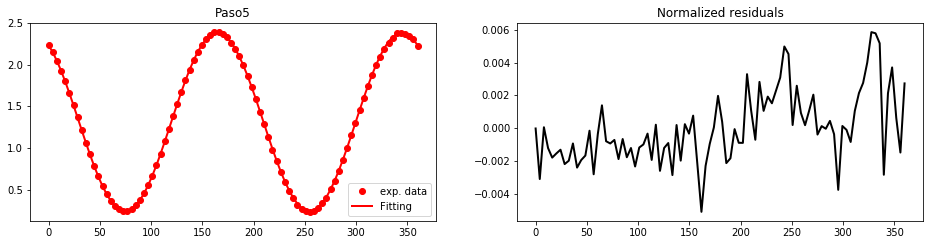

Parametros del paso 6
Th0r2b = 38.6355455647 deg; Th0_error = 0.4 deg;
Error del paso 6: 0.00976738612238.


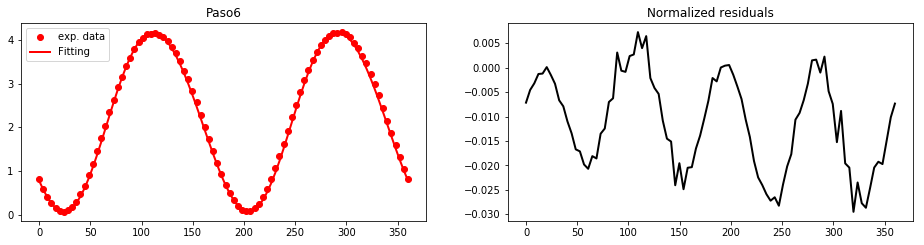

Parametros del paso 7
S_I = 4.5263798153; S_0 = 0.239373900152; S_45 = 0.343315816553; S_c = 4.45217706046; Th0_error = -0.119839719718 deg;
Error del paso 7: 0.00333706900008.
Parametros del paso 8
p11 = 0.989851359227; p12 = 0.00240297615468; p21 = 0.958107029972; p22 = -2.22396405051e-05; p31 = 0.955811425464; p32 = -0.0239166475664;
Th0p1 = 66.0921938346 deg; Th0p2 = 172.751708003 deg; Th0p3 = 107.285538852 deg; Th0_error = 0.4 deg;
Error del paso 8: 0.00791122091997.


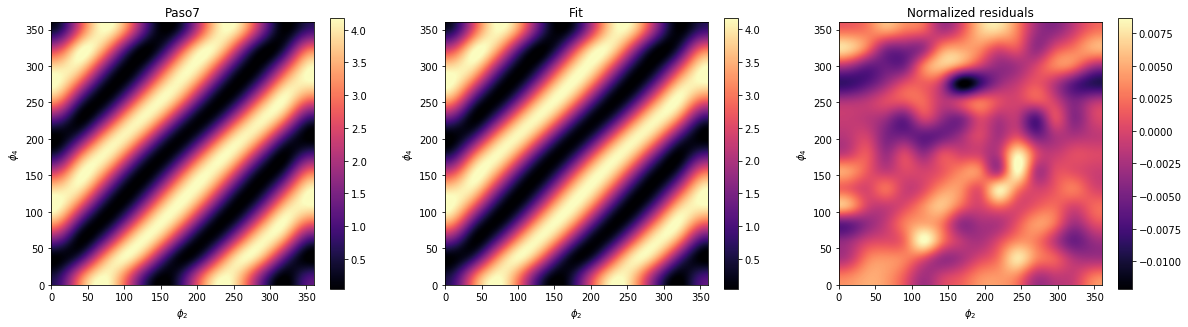

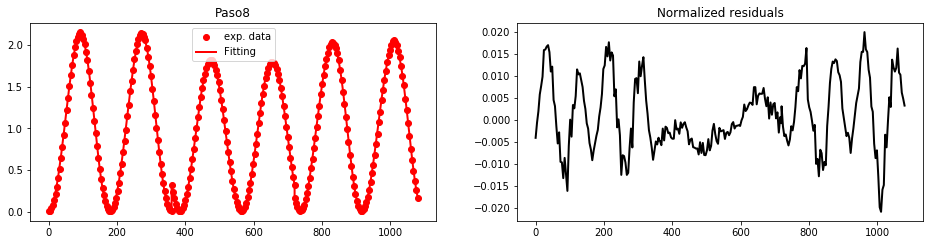

Parametros del paso 9
R2p1 = 0.96736719541; R2p2 = 0.981993901987; Delay_R2 = 81.4700349039; Th0_R2 = 55.0166499777; Delay_p1 = 175.176063905; Th0_error = -0.4; Th0_error2 = 0.4;
Error del paso 9: 0.0305171139456.
Elapsed time is 1115.09699988 s.


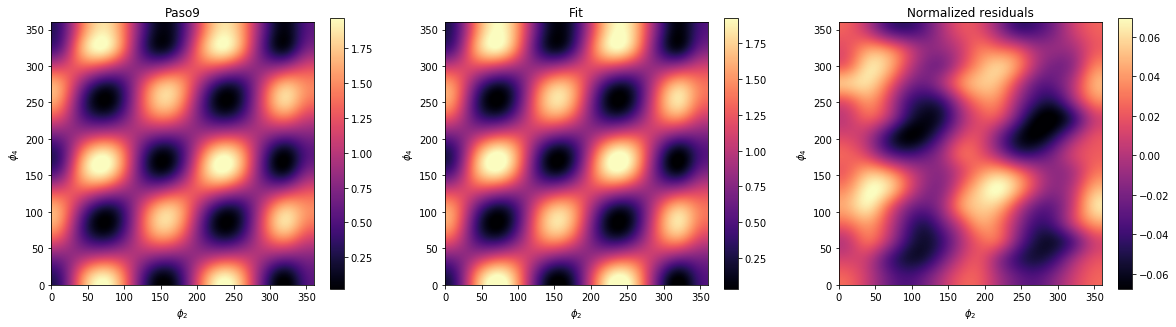

In [27]:
# Parametros del bucle
NmaxIteraciones = 15
tolerancia = 1e-3
PlotCadaPaso = False
ordenarPes = True
tol_while = 2e-3
N_it_while = 15
use_random_angles = True
# Parametros iniciales
(p11, p12, Dp1, p21, p22, p31, p32, pc1, pc2) = (0.95, 0.15, 0*degrees, 0.95, 0.15, 0.95, 0.15, 0.95, 0.3)
(R2p1, R2p2, Dr2) = (0.99, 0.99, 85*degrees)
Mp1 = ps.polarizer_linear(p1=p11, p2=p12)
Mr2 = ps.Mueller_Real_Retarder(R2p1, R2p2, Dr2)
(Ilum0, Ilum1, Ilum2, Ilum3) = (mean[0], 0, 0, mean[0])
Ifuente = np.matrix(np.array([[Ilum0], [Ilum1], [Ilum2], [Ilum3]]))
(th0p1b, th0p1, th0p2, th0p3, th0r2, th0r2b) = (0, 0, 0, 0, 0, 0)
# Parametros asociados a tolerancia de errores
(th0E0, errAmp, p_E0, p_errAmp, exp_crec, max_change, p_max_change) = (0, 90*degrees, 0, 0.1, 2, 20*degrees, 0.02)
(errAmpIt, p_errAmpIt) = (errAmp, p_errAmp)
# Inicializar donde guardo los datos de cada iteracion
errores = np.zeros([NmaxIteraciones, 5])
pes = np.zeros([NmaxIteraciones, 10])
ilums = np.zeros([NmaxIteraciones, 4])
delays = np.zeros([NmaxIteraciones, 2])
fangles = np.zeros([NmaxIteraciones, 6])
errangles = np.zeros([NmaxIteraciones, 5])
perrangles = np.zeros([NmaxIteraciones, 3])

# Hacer el bucle
start_time = time.time()
for indIt in range(NmaxIteraciones):
    # Actualizar amplitud de error por iteracion
    errAmptest = errAmp / (indIt+1)**exp_crec
    errAmpIt = max(errAmptest, errAmpIt-max_change)
    p_errAmptest = p_errAmp / (indIt+1)**exp_crec
    p_errAmpIt = max(p_errAmptest, p_errAmpIt-p_max_change)
    print('Iteracion {}'.format(indIt))
    if PlotCadaPaso:
        print('Amplitud de error en angulos = {}'.format(errAmpIt/degrees))
        
    ## Comenzar por ajustar el angulo de P1 en el motor 4 (Paso 5)
    (contador, error_Paso, mejor_error) = (0, 1, 1)
    while contador < N_it_while and error_Paso > tol_while:
        # Inicializar angulo en la primera iteracion
        if indIt == 0 and use_random_angles:
            th0p1b = np.random.rand(1)*pi
            th0p1b = th0p1b[0]
        # Parametros iniciales
        par0 = [pc1, pc2, th0p1b]
        # Normalizacion de intensidades experimentales en funcion de la referencia
        Iexperimental = Intensity_Paso5[:,0] * Intensity_Paso5[:,1]/mean[1]
        # Ajuste
        par1, success = optimize.leastsq(err_paso5, par0, args=(angle1*degrees, Iexperimental))
        # Calculo de errores
        error_Paso = err_paso5(par1, angle1*degrees, Iexperimental)
        error_Paso = np.std(error_Paso) / Iexperimental.max()
        # Guardar mejores resultados
        if error_Paso < mejor_error:
            par_mejor = par1
        # Operaciones final de bucle        
        contador = contador + 1
        if PlotCadaPaso and N_it_while > 1:
            print('Subiteracion {} da error {}.'.format(contador, error_Paso))
    # Guardar resultados
    pc1 = max(par_mejor[0], par_mejor[1])
    pc2 = min(par_mejor[0], par_mejor[1])    
    (pes[indIt, 8], pes[indIt, 9]) = (pc1, pc2)
    fangles[indIt, 4] = th0p1b
    errores[indIt, 0] = error_Paso
    # Extraer resultados para siguientes iteraciones. Hay que tener en cuenta que 
    # el valor del angulo debe cambiar en 90º si el parametro correspondiente a p1
    # es menor que el de p2
    if pc1 == par_mejor[0]:
        th0p1b = par_mejor[2]%pi
    else:
        th0p1b = (par_mejor[2]+pi/2)%pi            
    # Plots
    if PlotCadaPaso or indIt+1 == NmaxIteraciones:
        print("Parametros del paso 5")
        print("pc1 = {}; pc2 = {}; Th0p1b = {} deg;".format(par1[0], par1[1], (par1[2]%pi)/degrees))
        print("Error del paso 5: {}.".format(errores[indIt, 0]))
        I_fit = model_paso5(par1, angle1*degrees)
        plot_experiment_residuals_1D(angle1*degrees, Iexperimental, I_fit,  title='Paso5')
    
    
    ## Ahora el del retardador 2 la primera vez que lo metimos (Paso 6)
    (contador, error_Paso, mejor_error) = (0, 1, 1)
    while contador < N_it_while and error_Paso > tol_while:
        # Inicializar angulo en la primera iteracion
        if indIt == 0 and use_random_angles:
            th0r2b = np.random.rand(1)*pi   
            th0r2b = th0r2b[0]
        # Parametros iniciales
        par0 = [th0r2b, th0E0]
        # Normalizacion de intensidades experimentales en funcion de la referencia
        Iexperimental = Intensity_Paso6[:,0] * Intensity_Paso6[:,1]/mean[1]
        # Ajuste
        par1, success = optimize.leastsq(err_paso6, par0, args=(angle1*degrees, Iexperimental))  
        # Calculo de errores
        error_Paso = err_paso6(par1, angle1*degrees, Iexperimental)
        error_Paso = np.std(error_Paso) / Iexperimental.max() 
        # Guardar mejores resultados
        if error_Paso < mejor_error:
            par_mejor = par1
        # Operaciones final de bucle        
        contador = contador + 1
        if PlotCadaPaso and N_it_while > 1:
            print('Subiteracion {} da error {}.'.format(contador, error_Paso))
    # Extraer resultados para siguientes iteraciones
    th0r2b = par_mejor[0]%pi
    th_error = errAmpIt * erf(par_mejor[1])
    # Arreglar parametros anteriores que el nuevo ajuste pide cambiar
    Ifuente = ps.rotate_stokes(Ifuente, th_error)
    # Guardar resultados
    fangles[indIt, 5] = th0r2b
    errangles[indIt, 0] = th_error
    errores[indIt, 1] = error_Paso
    # Plots
    if PlotCadaPaso or indIt+1 == NmaxIteraciones:
        print("Parametros del paso 6")
        print("Th0r2b = {} deg; Th0_error = {} deg;".format((par1[0]%pi)/degrees, th_error/degrees))
        print("Error del paso 6: {}.".format(errores[indIt, 1]))
        I_fit = model_paso6(par1, angle1*degrees)
        plot_experiment_residuals_1D(angle1*degrees, Iexperimental, I_fit,  title='Paso6')
    
    ## Vamos a ajustar la iluminacion (Paso 7)
    # Parametros iniciales
    #par0 = [Ilum0, Ilum1, Ilum2, Ilum3]
    par0 = [Ilum0, Ilum1, Ilum2, Ilum3, th0E0]
    # Normalizacion de intensidades experimentales en funcion de la referencia
    Iexperimental = Intensity_Paso7[:,:,0] * Intensity_Paso7[:,:,1]/mean[1]
    #Iexperimental = np.transpose(Iexperimental)
    # Ajuste
    par1, success = optimize.leastsq(err_paso7, par0, args=(angles2x*degrees, angles2y*degrees, Iexperimental))
    # Extraer resultados para siguientes iteraciones
    (Ilum0, Imlum1, Ilum2, Ilum3) = (par1[0], par1[1], par1[2], par1[3])
    Ifuente = np.matrix(np.array([[Ilum0], [Ilum1], [Ilum2], [Ilum3]]))
    th_error = errAmpIt * erf(par1[4])
    # Arreglar parametros anteriores que el nuevo ajuste pide cambiar
    th0p1b = th0p1b + th_error
    # Guardar resultados
    ilums[indIt, 0:4] = (Ilum0, Imlum1, Ilum2, Ilum3)
    errangles[indIt, 1] = th_error
    # Calculo de errores
    error_Paso = err_paso7(par1, angles2x*degrees, angles2y*degrees, Iexperimental)
    errores[indIt, 2] = np.std(error_Paso) / Iexperimental.max()
    # Plots
    if PlotCadaPaso or indIt+1 == NmaxIteraciones:
        print("Parametros del paso 7")
        print("S_I = {}; S_0 = {}; S_45 = {}; S_c = {}; Th0_error = {} deg;".format(par1[0], par1[1], par1[2], par1[3], th_error/degrees))
        print("Error del paso 7: {}.".format(errores[indIt, 2]))
        I_fit = model_paso7(par1, angles2x*degrees, angles2y*degrees) 
        plt.figure(figsize=(20, 5))       
        plt.subplot(1,3,1)
        plot_2d(angles2x*degrees, angles2y*degrees, Iexperimental, title='Paso7')    
        plt.subplot(1,3,2)
        plot_2d(angles2x*degrees, angles2y*degrees, I_fit, title='Fit')    
        plt.subplot(1,3,3)
        plot_2d(angles2x*degrees, angles2y*degrees,  (Iexperimental-I_fit)/Iexperimental.max(), title='Normalized residuals')
    
    ## Ahora vamos a por los polarizadores (Paso 8)
    (contador, error_Paso, mejor_error) = (0, 1, 1)
    maxval = np.array([IexpA.max(), IexpB.max(), IexpC.max()]).max()
    while contador < N_it_while and error_Paso > tol_while:
        # Inicializar angulo en la primera iteracion
        if indIt == 0 and use_random_angles:
            (th0p1, th0p2, th0p3) = np.random.rand(3)*pi
        # Parametros iniciales
        par0 = [p11, p12, p21, p22, p31, p32, th0p3, th0p2, th0p1, th0E0]
        # Normalizacion de intensidades experimentales en funcion de la referencia 
        IexpA = Intensity_Paso8a[:,0] * Intensity_Paso8a[:,1]/mean[1]
        IexpB = Intensity_Paso8b[:,0] * Intensity_Paso8b[:,1]/mean[1]
        IexpC = Intensity_Paso8c[:,0] * Intensity_Paso8c[:,1]/mean[1]
        # Ajuste
        par1, success = optimize.leastsq(err_paso8, par0, args=(
            angle1*degrees, angle1*degrees, angle1*degrees, IexpA, IexpB, IexpC))
        # Calculo de errores
        error_Paso = err_paso8(par1, angle1*degrees, angle1*degrees, angle1*degrees, IexpA, IexpB, IexpC)
        error_Paso = np.std(error_Paso) / maxval
        # Guardar mejores resultados
        if error_Paso < mejor_error:
            par_mejor = par1
        # Operaciones final de bucle        
        contador = contador + 1
        if PlotCadaPaso and N_it_while > 1:
            print('Subiteracion {} da error {}.'.format(contador, error_Paso))  
    # Extraer resultados para siguientes iteraciones. Hay que tener en cuenta que 
    # el valor del angulo debe cambiar en 90º si el parametro correspondiente a p1
    # es menor que el de p2
    p11 = max(par_mejor[0], par_mejor[1])
    p12 = min(par_mejor[0], par_mejor[1])
    p21 = max(par_mejor[2], par_mejor[3])
    p22 = min(par_mejor[2], par_mejor[3])
    p31 = max(par_mejor[4], par_mejor[5])
    p32 = min(par_mejor[4], par_mejor[5]) 
    if p11 == par_mejor[0]:
        th0p1 = par_mejor[8]%pi
    else:
        th0p1 = (par_mejor[8]+pi/2)%pi
    if p21 == par_mejor[2]:
        th0p2 = par_mejor[7]%pi
    else:
        th0p2 = (par_mejor[7]+pi/2)%pi
    if p31 == par_mejor[4]:
        th0p3 = par_mejor[6]%pi
    else:
        th0p3 = (par_mejor[6]+pi/2)%pi
    Mp2 = ps.polarizer_linear(p1=p21, p2=p22)
    th_error = errAmpIt * erf(par_mejor[9])
    # Arreglar parametros anteriores que el nuevo ajuste pide cambiar
    Ifuente = ps.rotate_stokes(Ifuente, th_error)
    # Guardar resultados
    pes[indIt, 0:6] = (p11, p12, p21, p22, p31, p32)
    fangles[indIt, 0:3] = (th0p1, th0p2, th0p3)
    errangles[indIt, 2] = th_error
    errores[indIt, 3] = error_Paso 
    # Plots
    if PlotCadaPaso or indIt+1 == NmaxIteraciones:
        print("Parametros del paso 8")
        print("p11 = {}; p12 = {}; p21 = {}; p22 = {}; p31 = {}; p32 = {};".format(par1[0], par1[1], par1[2], par1[3], par1[4], par1[5]))
        print("Th0p1 = {} deg; Th0p2 = {} deg; Th0p3 = {} deg; Th0_error = {} deg;".format((par1[8]%pi)/degrees, (par1[7]%pi)/degrees, (par1[6]%pi)/degrees, th_error/degrees))
        print("Error del paso 8: {}.".format(errores[indIt, 3]))
        I_fit = model_paso8(par1, angle1*degrees, angle1*degrees, angle1*degrees)
        plot_experiment_residuals_1D(np.concatenate([angle1*degrees,angle1*degrees + 2*pi,angle1*degrees + 4*pi]), 
                           np.concatenate([IexpA,IexpB,IexpC]), 
                           np.concatenate((I_fit[0],I_fit[1],I_fit[2])),  title='Paso8')
    
    ## Por último, ajustamos el retardador (Paso 9)
    (contador, error_Paso, mejor_error) = (0, 1, 1)
    while contador < N_it_while and error_Paso > tol_while:
        # Inicializar angulo en la primera iteracion
        if indIt == 0 and use_random_angles:
            th0r2 = np.random.rand(1)*pi   
            th0r2 = th0r2[0]
        # Parametros iniciales
        par0 = [R2p1, R2p2, Dr2, th0r2, Dp1, th0E0, th0E0]
        # Normalizacion de intensidades experimentales en funcion de la referencia
        Iexperimental = Intensity_Paso9[:,:,0] * Intensity_Paso9[:,:,1]/mean[1]
        # Ajuste
        par1, success = optimize.leastsq(err_paso9, par0, args=(angles2x*degrees, angles2y*degrees, Iexperimental))
        # Calculo de errores
        error_Paso = err_paso9(par1, angles2x*degrees, angles2y*degrees, Iexperimental)
        error_Paso = np.std(error_Paso) / Iexperimental.max()
        # Guardar mejores resultados
        if error_Paso < mejor_error:
            par_mejor = par1
        # Operaciones final de bucle        
        contador = contador + 1
        if PlotCadaPaso and N_it_while > 1:
            print('Subiteracion {} da error {}.'.format(contador, error_Paso))  
    # Extraer resultados para siguientes iteraciones
    (R2p1, R2p2, Dr2, th0r2, Dp1) = (par_mejor[0], par_mejor[1], par_mejor[2]%pi, par_mejor[3]%pi, par_mejor[4]%pi)
    Mr2 = ps.Mueller_Real_Retarder(R2p1, R2p2, Dr2)
    Mp1 = ps.Mueller_Real_Retarder(p11, p12, Dp1)
    th_error = errAmpIt * erf(par1[5])
    th_error2 = errAmpIt * erf(par1[6])
    # Arreglar parametros anteriores que el nuevo ajuste pide cambiar
    th0p1 = th0p1 + th_error
    Ifuente = ps.rotate_stokes(Ifuente, th_error2)
    # Guardar resultados
    pes[indIt, 6:8] = (R2p1, R2p2)
    delays[indIt, 0:2] = (Dr2, Dp1)
    fangles[indIt, 3] = th0r2
    errangles[indIt, 3:5] = (th_error, th_error2)
    errores[indIt, 4] =error_Paso 
    # Plots
    if PlotCadaPaso or indIt+1 == NmaxIteraciones:
        print("Parametros del paso 9")
        print("R2p1 = {}; R2p2 = {}; Delay_R2 = {}; Th0_R2 = {}; Delay_p1 = {}; Th0_error = {}; Th0_error2 = {};".format(
            par1[0], par1[1], (par1[2]%pi)/degrees, (par1[3]%pi)/degrees, (par1[4]%pi)/degrees, th_error/degrees, th_error2/degrees))
        I_fit = model_paso9(par1, angles2x*degrees, angles2y*degrees)        
        plt.figure(figsize=(20, 5))       
        plt.subplot(1,3,1)
        plot_2d(angles2x*degrees, angles2y*degrees, Iexperimental, title='Paso9')    
        plt.subplot(1,3,2)
        plot_2d(angles2x*degrees, angles2y*degrees, I_fit, title='Fit')    
        plt.subplot(1,3,3)
        plot_2d(angles2x*degrees, angles2y*degrees, (Iexperimental-I_fit)/Iexperimental.max(), title='Normalized residuals')
    # Este es el determinante, asi que se representa en cada iteracion
    print("Error del paso 9: {}.".format(errores[indIt, 4]))
    
    # No volver a correr los bucles while más de una vez
    N_it_while = 1
    
    ## Ver si el error es suficientemente bajo
    iteracion_final = indIt
    if errores[indIt, :].min() < tolerancia:
        break
        
# # Print parametros fina
# print('Parametros de iluminacion: [{}, {}, {}, {}]'.format(
#     Ifuente[0], Ifuente[1], Ifuente[2], Ifuente[3]))
# print('Parametros de P1: p1 = {}; p2 = {}; Delay = {}º; Th0 = {}º.'.format(
#     p11, p12, Dp1/degrees, th0p1/degrees))
# print('Parametros de R2: p1 = {}; p2 = {}; Delay = {}º; Th0 = {}º.'.format(
#     R2p1, R2p2, Dr2/degrees, th0r2/degrees))
# print('Parametros de P2: p1 = {}; p2 = {}; Th0 = {}º.'.format(
#     p21, p22, th0p1/degrees))
# print('Parametros de P3: p1 = {}; p2 = {}; Th0 = {}º.'.format(
#     p31, p32, th0p1/degrees))
# print('Errores finales: Paso 5 = {}; Paso 6 = {}; Paso 7 = {}; Paso 8 = {}; Paso 9 = {}.'.format(
#     errores[indIt,0], errores[indIt,1], errores[indIt,2], errores[indIt,3], errores[indIt,4]))
end_time = time.time()
print('Elapsed time is {} s.'.format(end_time - start_time))
    

C:\Users\Jesus\Anaconda2\lib\site-packages\matplotlib\legend.py:593: UserWarning: The handle <matplotlib.lines.Line2D object at 0x000000000E0DAC50> has a label of '_' which cannot be automatically added to the legend.
  'legend.'.format(handle, label))


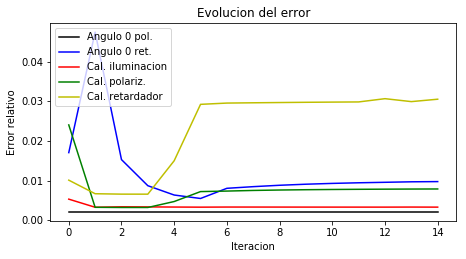

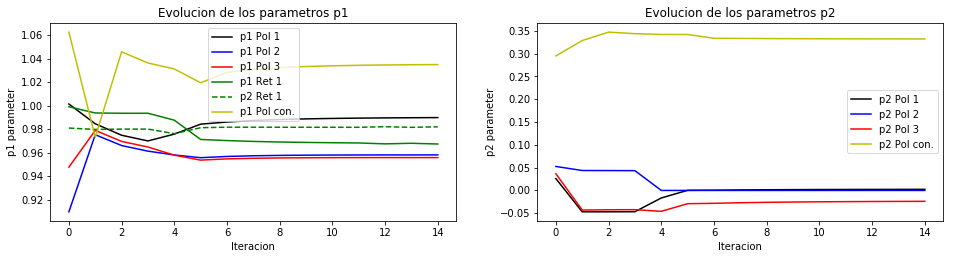

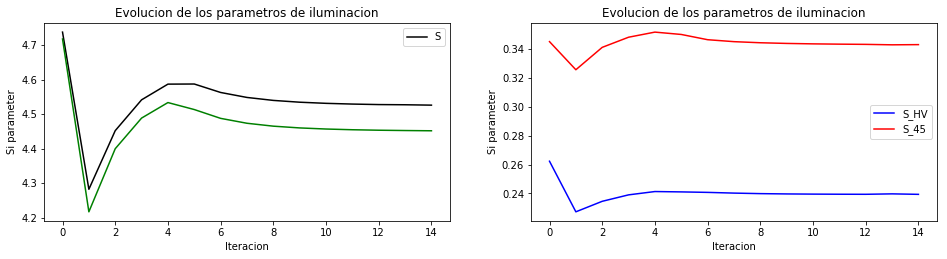

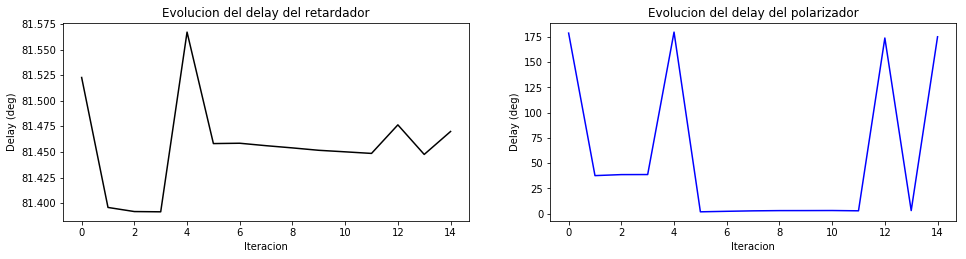

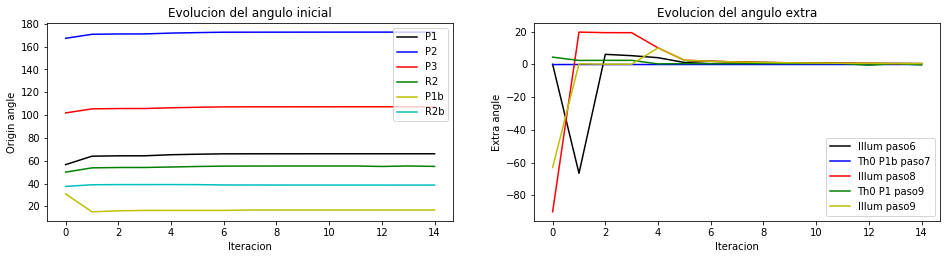

In [28]:
## Plot los resultados
# Plot errores
plt.figure(figsize=(16, 8))
plt.subplot(2, 2, 1)
plt.plot(errores[0:indIt+1,0],'k')
plt.plot(errores[0:indIt+1,1],'b')
plt.plot(errores[0:indIt+1,2],'r')
plt.plot(errores[0:indIt+1,3],'g')
plt.plot(errores[0:indIt+1,4],'y')
plt.xlabel('Iteracion')
plt.ylabel('Error relativo')
plt.title('Evolucion del error')
plt.legend(('Angulo 0 pol.', 'Angulo 0 ret.', 'Cal. iluminacion', 'Cal. polariz.', 'Cal. retardador'))

# Plot pes
plt.figure(figsize=(16, 8))
plt.subplot(2, 2, 1)
plt.plot(pes[0:indIt+1,0],'k')
plt.plot(pes[0:indIt+1,2],'b')
plt.plot(pes[0:indIt+1,4],'r')
plt.plot(pes[0:indIt+1,6],'g')
plt.plot(pes[0:indIt+1,7],'g--')
plt.plot(pes[0:indIt+1,8],'y')
plt.xlabel('Iteracion')
plt.ylabel('p1 parameter')
plt.title('Evolucion de los parametros p1')
plt.legend(('p1 Pol 1',  'p1 Pol 2', 'p1 Pol 3','p1 Ret 1', 'p2 Ret 1', 'p1 Pol con.' ))

plt.subplot(2, 2, 2)
plt.plot(pes[0:indIt+1,1],'k')
plt.plot(pes[0:indIt+1,3],'b')
plt.plot(pes[0:indIt+1,5],'r')
plt.plot(pes[0:indIt+1,9],'y')
plt.xlabel('Iteracion')
plt.ylabel('p2 parameter')
plt.title('Evolucion de los parametros p2')
plt.legend(('p2 Pol 1', 'p2 Pol 2', 'p2 Pol 3', 'p2 Pol con.' ))

# Illums
plt.figure(figsize=(16, 8))
plt.subplot(2, 2, 1)
plt.plot(ilums[0:indIt+1,0],'k')
plt.plot(ilums[0:indIt+1,3],'g')
plt.xlabel('Iteracion')
plt.ylabel('Si parameter')
plt.title('Evolucion de los parametros de iluminacion')
plt.legend(('S_I' 'S_circ'))

plt.subplot(2, 2, 2)
plt.plot(ilums[0:indIt+1,1],'b')
plt.plot(ilums[0:indIt+1,2],'r')
plt.xlabel('Iteracion')
plt.ylabel('Si parameter')
plt.title('Evolucion de los parametros de iluminacion')
plt.legend(('S_HV', 'S_45'))

# Delays
plt.figure(figsize=(16, 8))
plt.subplot(2, 2, 1)
plt.plot(delays[0:indIt+1,0]/degrees,'k')
plt.xlabel('Iteracion')
plt.ylabel('Delay (deg)')
plt.title('Evolucion del delay del retardador')

plt.subplot(2, 2, 2)
plt.plot(delays[0:indIt+1,1]/degrees,'b')
plt.xlabel('Iteracion')
plt.ylabel('Delay (deg)')
plt.title('Evolucion del delay del polarizador')

# Angles y errangles
plt.figure(figsize=(16, 8))
plt.subplot(2, 2, 1)
plt.plot(fangles[0:indIt+1,0]/degrees,'k')
plt.plot(fangles[0:indIt+1,1]/degrees,'b')
plt.plot(fangles[0:indIt+1,2]/degrees,'r')
plt.plot(fangles[0:indIt+1,3]/degrees,'g')
plt.plot(fangles[0:indIt+1,4]/degrees,'y')
plt.plot(fangles[0:indIt+1,5]/degrees,'c')
plt.xlabel('Iteracion')
plt.ylabel('Origin angle')
plt.title('Evolucion del angulo inicial')
plt.legend(('P1', 'P2', 'P3', 'R2', 'P1b', 'R2b'))
plt.subplot(2, 2, 2)
plt.plot(errangles[0:indIt+1,0]/degrees,'k')
plt.plot(errangles[0:indIt+1,1]/degrees,'b')
plt.plot(errangles[0:indIt+1,2]/degrees,'r')
plt.plot(errangles[0:indIt+1,3]/degrees,'g')
plt.plot(errangles[0:indIt+1,4]/degrees,'y')
plt.xlabel('Iteracion')
plt.ylabel('Extra angle')
plt.title('Evolucion del angulo extra')
plt.legend(('Illum paso6', 'Th0 P1b paso7', 'Illum paso8', 'Th0 P1 paso9', 'Illum paso9'))

## Ajustes individuales 

Para ver si se puede mejorar a mano.

### Primera iteracion

Parametros del paso 5
pc1 = 1.09070690168; pc2 = 0.273387249795; Th0p1b = 114.407656401 deg;
Error del paso 5: 0.00177205461833.


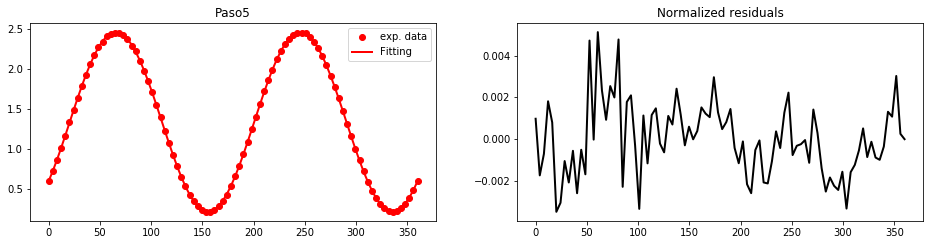

In [19]:
# Parametros del bucle
PlotCadaPaso = True
errAmpIt = 10*degrees
# Parametros iniciales
(p11, p12, pc1, pc2) = (0.95, 0.15, 0.95, 0.4)
(R2p1, R2p2, Dr2) = (0.99, 0.99, 85*degrees)
Mp1 = ps.polarizer_linear(p1=p11, p2=p12)
(Ilum0, Ilum1, Ilum2, Ilum3) = (mean[0], 0, 0, mean[0])
Ifuente = np.matrix(np.array([[Ilum0], [Ilum1], [Ilum2], [Ilum3]]))
th0p1b = 0

def model_paso5(par, th1): 
    # Create Jones matrices
    Mpmalo = ps.polarizer_linear(p1=par[0], p2=par[1])
    M = [Mpmalo, Mp1]
    th = [0, th1+par[2]]
    Iteor = Intensity_Rotating_Elements(M, th, Ei = Ifuente)
    return Iteor
def err_paso5(par, th1, Ireal): 
    Iteor = model_paso5(par, th1)
    diferencia = Iteor - Ireal
    return diferencia

# Update error amplitude for the current iteration
errAmpIt = 10*degrees
## Comenzar por ajustar el angulo de P1 en el motor 4 (Paso 5)
# Parametros iniciales
par0 = [pc1, pc2, th0p1b]
# Normalizacion de intensidades experimentales en funcion de la referencia
Iexperimental = Intensity_Paso5[:,0] * Intensity_Paso5[:,1]/mean[1]
# Ajuste
par1, success = optimize.leastsq(err_paso5, par0, args=(angle1*degrees, Iexperimental))
# Extraer resultados
th0p1b = par1[2]%pi
# Calculo de errores
error_Paso5 = err_paso5(par1, angle1*degrees, Iexperimental)
error_Paso5 = np.std(error_Paso5) / Iexperimental.max()
# Plots
if PlotCadaPaso:
    print("Parametros del paso 5")
    print("pc1 = {}; pc2 = {}; Th0p1b = {} deg;".format(par1[0], par1[1], (par1[2]%pi)/degrees))
    print("Error del paso 5: {}.".format(error_Paso5))
    I_fit = model_paso5(par1, angle1*degrees)
    plot_experiment_residuals_1D(angle1*degrees, Iexperimental, I_fit,  title='Paso5')

Parametros del paso 6
Th0r2b = 32.6192742099 deg; Th0_error = 0.0 deg;
Error del paso 6: 0.0238653924595.


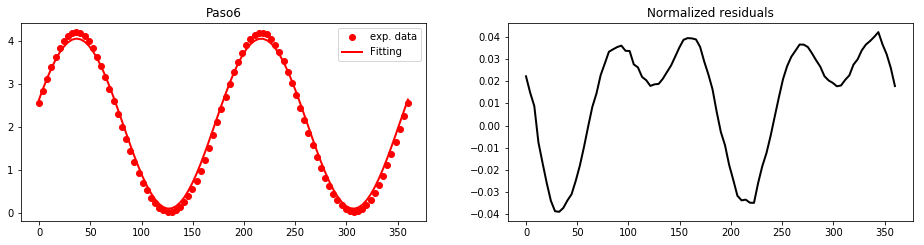

In [20]:
## Ahora el del retardador 2 la primera vez que lo metimos (Paso 6)
def model_paso6(par, th1): 
    # Create Jones matrices
    M = [Mr2, Mp1]
    th_error = errAmpIt * erf(par[1])
    Ipaso6 = ps.rotate_stokes(Ifuente, th_error)
    th = [th1+par[0], +th0p1b]
    Iteor = Intensity_Rotating_Elements(M, th, Ei = Ipaso6)
    return Iteor
def err_paso6(par, th1, Ireal): 
    Iteor = model_paso6(par, th1)
    diferencia = Iteor - Ireal
    return diferencia

# Parametros iniciales
(R2p1, R2p2, Dr2) = (0.99, 0.99, 85*degrees)
Mr2 = ps.Mueller_Real_Retarder(R2p1, R2p2, Dr2)
(th0r2b, th0E0) = (0, 0)

# Parametros iniciales
par0 = [th0r2b, th0E0]
# Normalizacion de intensidades experimentales en funcion de la referencia
Iexperimental = Intensity_Paso6[:,0] * Intensity_Paso6[:,1]/mean[1]
# Ajuste
par1, success = optimize.leastsq(err_paso6, par0, args=(angle1*degrees, Iexperimental))
# Extraer resultados
th0r2b = par1[0]%pi
th_error = errAmpIt * erf(par1[1])
# Calculo de errores
error_Paso6 = err_paso6(par1, angle1*degrees, Iexperimental)
error_Paso6 = np.std(error_Paso6) / Iexperimental.max()
# Plots
if PlotCadaPaso:
    print("Parametros del paso 6")
    print("Th0r2b = {} deg; Th0_error = {} deg;".format((par1[0]%pi)/degrees, th_error/degrees))
    print("Error del paso 6: {}.".format(error_Paso6))
    I_fit = model_paso6(par1, angle1*degrees)
    plot_experiment_residuals_1D(angle1*degrees, Iexperimental, I_fit,  title='Paso6')

Parametros del paso 7
S_I = 4.79583638656; S_0 = 0.329560413841; S_45 = 0.291680852508; S_c = 4.77560035489; Th0_error = -0.0492846876805 deg;
Error del paso 7: 0.00530021956385.


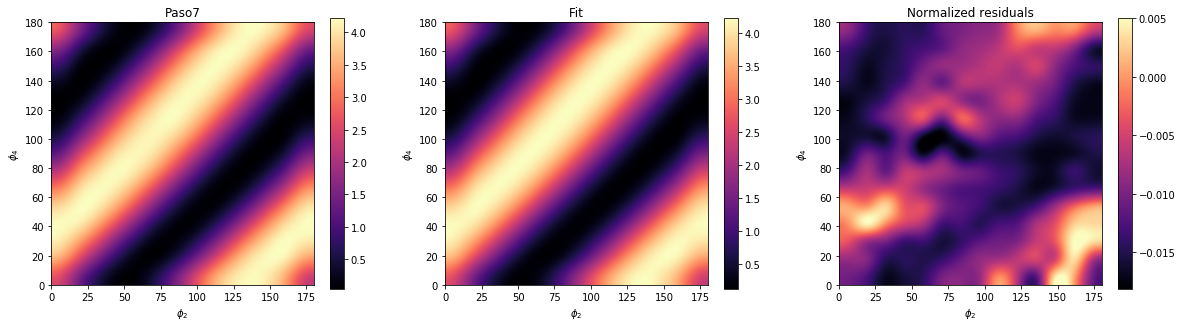

In [21]:
def model_paso7(par, th1, th2):
    # Conservacion de la energia
    Itotal = sqrt(par[1]**2 + par[2]**2 + par[3]**2)
    if Itotal > par[0]:
        par[0] = Itotal
    # Iluminacion y angulos
    th_error = errAmpIt * erf(par[4])
    Itest = np.matrix(np.array([[par[0]], [par[1]], [par[2]], [par[3]]]))    
    th = [th1+th0r2b, th2+th0p1b+th_error]      
    #th = [th1+par[4], th2+par[5]]
    M = [Mr2, Mp1]
    I = Intensity_Rotating_Elements(M, th, Itest, False)
    return I
def err_paso7(par, th1, th2, Ireal): 
    dI = model_paso7(par, th1, th2) - Ireal 
    return dI.flatten()

(Ilum0, Ilum1, Ilum2, Ilum3) = (mean[0], 0, 0, mean[0])

## Vamos a ajustar la iluminacion (Paso 7)
# Parametros iniciales
#par0 = [Ilum0, Ilum1, Ilum2, Ilum3]
par0 = [Ilum0, Ilum1, Ilum2, Ilum3, th0E0]
# Normalizacion de intensidades experimentales en funcion de la referencia
Iexperimental = Intensity_Paso7[:,:,0] * Intensity_Paso7[:,:,1]/mean[1]
#Iexperimental = np.transpose(Iexperimental)
# Ajuste
par1, success = optimize.leastsq(err_paso7, par0, args=(angles2x*degrees, angles2y*degrees, Iexperimental))
# Extraer resultados
(Ilum0, Imlum1, Ilum2, Ilum3) = (par1[0], par1[1], par1[2], par1[3])
Ifuente = np.matrix(np.array([[Ilum0], [Ilum1], [Ilum2], [Ilum3]]))
th_error = errAmpIt * erf(par1[4])
# Calculo de errores
error_Paso7 = err_paso7(par1, angles2x*degrees, angles2y*degrees, Iexperimental)
error_Paso7 = np.std(error_Paso7) / Iexperimental.max()
# Plots
if PlotCadaPaso:
    print("Parametros del paso 7")
    print("S_I = {}; S_0 = {}; S_45 = {}; S_c = {}; Th0_error = {} deg;".format(par1[0], par1[1], par1[2], par1[3], th_error/degrees))
    print("Error del paso 7: {}.".format(error_Paso7))
    I_fit = model_paso7(par1, angles2x*degrees, angles2y*degrees) 
    plt.figure(figsize=(20, 5))       
    plt.subplot(1,3,1)
    plot_2d(angles2x*degrees, angles2y*degrees, Iexperimental, title='Paso7')    
    plt.subplot(1,3,2)
    plot_2d(angles2x*degrees, angles2y*degrees, I_fit, title='Fit')    
    plt.subplot(1,3,3)
    plot_2d(angles2x*degrees, angles2y*degrees,  (Iexperimental-I_fit)/Iexperimental.max(), title='Normalized residuals')
    

Parametros del paso 8
p11 = 0.173464976861; p12 = 0.937296084254; p21 = 0.932932008178; p22 = 4.39485452306e-05; p31 = 0.914022994579; p32 = 0.115687961145;
Th0p1 = 34.0408256206 deg; Th0p2 = 45.1275403535 deg; Th0p3 = 37.466021624 deg; Th0_error = 20.0 deg;
Error del paso 8: 0.0204526321658.


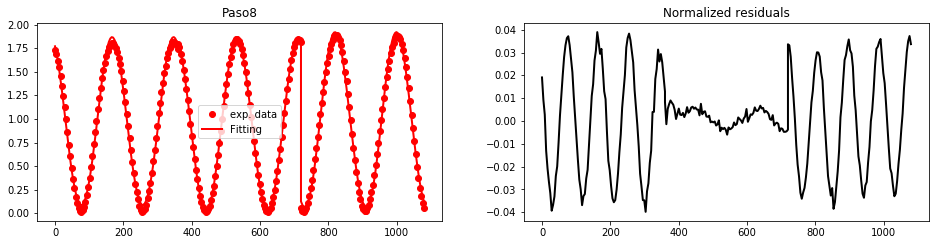

In [29]:
def model_paso8(par, th1a, th1b, th1c): 
    # Create Jones matrices
    Mp1 = ps.polarizer_linear(p1=par[0], p2=par[1])
    Mp2 = ps.polarizer_linear(p1=par[2], p2=par[3])
    Mp3 = ps.polarizer_linear(p1=par[4], p2=par[5])
    th_error = errAmpIt * erf(par[9])
    Ipaso8 = ps.rotate_stokes(Ifuente, th_error)
    # First, P3 and P1   
    M = [Mp3, Mp1]
    th = [th1a+par[6], +th0p1b]
    Ia = Intensity_Rotating_Elements(M, th, Ei = Ipaso8)
    # Then, P3 and P2   
    M = [Mp3, Mp2]
    th = [+par[6], th1b+par[7]]
    Ib = Intensity_Rotating_Elements(M, th, Ei = Ipaso8)
    # Last, P1 and P2  
    M = [Mp1, Mp2]
    th = [th1c+par[8], +par[7]]
    Ic = Intensity_Rotating_Elements(M, th, Ei = Ipaso8)
    # End
    return (Ia, Ib, Ic)
def err_paso8(par, th1a, th1b, th1c, IRa, IRb, IRc): 
    (Ia, Ib, Ic) = model_paso8(par, th1a, th1b, th1c)
    dIa = Ia - IRa
    dIb = Ib - IRb
    dIc = Ic - IRc
    dI = np.concatenate((dIa, dIb, dIc))
    return dI

(p11, p12, Dp1, p21, p22, p31, p32) = (0.95, 0.15, 0*degrees, 0.95, 0.15, 0.95, 0.15)
(th0p1, th0p2, th0p3) = (0, 0, 0)
errAmpIt = 20*degrees

## Ahora vamos a por los polarizadores (Paso 8)
# Parametros iniciales
par0 = [p11, p12, p21, p22, p31, p32, th0p3, th0p2, th0p1, th0E0]
# Normalizacion de intensidades experimentales en funcion de la referencia 
IexpA = Intensity_Paso8a[:,0] * Intensity_Paso8a[:,1]/mean[1]
IexpB = Intensity_Paso8b[:,0] * Intensity_Paso8b[:,1]/mean[1]
IexpC = Intensity_Paso8c[:,0] * Intensity_Paso8c[:,1]/mean[1]
# Ajuste
par1, success = optimize.leastsq(err_paso8, par0, args=(
    angle1*degrees, angle1*degrees, angle1*degrees, IexpA, IexpB, IexpC))
# Extraer resultados
(p11, p12, p21, p22, p31, p32) = (par1[0], par1[1], par1[2], par1[3], par1[4], par1[5])
(th0p3, th0p2, th0p1) = (par1[6]%pi, par1[7]%pi, par1[8]%pi)
Mp2 = ps.polarizer_linear(p1=p21, p2=p22)
th_error = errAmpIt * erf(par1[9])
# Calculo de errores
error_Paso8 = err_paso8(par1, angle1*degrees, angle1*degrees, angle1*degrees, IexpA, IexpB, IexpC)
maxval = np.array([IexpA.max(), IexpB.max(), IexpC.max()]).max()
error_Paso8 = np.std(error_Paso8) / maxval
# Plots
if PlotCadaPaso:
    print("Parametros del paso 8")
    print("p11 = {}; p12 = {}; p21 = {}; p22 = {}; p31 = {}; p32 = {};".format(par1[0], par1[1], par1[2], par1[3], par1[4], par1[5]))
    print("Th0p1 = {} deg; Th0p2 = {} deg; Th0p3 = {} deg; Th0_error = {} deg;".format((par1[8]%pi)/degrees, (par1[7]%pi)/degrees, (par1[6]%pi)/degrees, th_error/degrees))
    print("Error del paso 8: {}.".format(error_Paso8))
    I_fit = model_paso8(par1, angle1*degrees, angle1*degrees, angle1*degrees)
    plot_experiment_residuals_1D(np.concatenate([angle1*degrees,angle1*degrees + 2*pi,angle1*degrees + 4*pi]), 
                       np.concatenate([IexpA,IexpB,IexpC]), 
                       np.concatenate((I_fit[0],I_fit[1],I_fit[2])),  title='Paso8')

Parametros del paso 9
R2p1 = 0.995616351948; R2p2 = 1.05050333285; Delay_R2 = 82.104557021; Th0_R2 = 8.78374148077; Delay_p1 = 78.5815578056; Th0_error = -6.63672140508; Th0_error2 = -20.0;
Error del paso 9: 0.0195966479809.


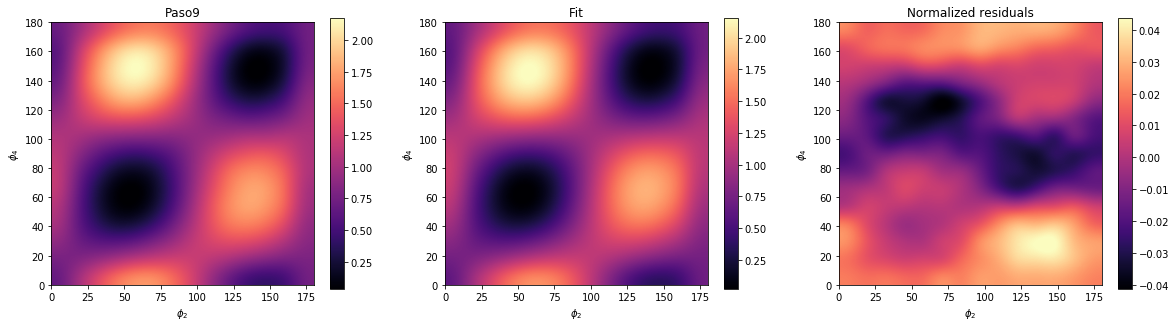

In [30]:
def model_paso9(par, th1, th2):
    Mr2 = ps.Mueller_Real_Retarder(par[0], par[1], par[2])
    Mp1 = ps.Mueller_Real_Retarder(p11, p12, par[4])
    th_error = errAmpIt * erf(par[5])
    th_error2 = errAmpIt * erf(par[6])
    Ipaso9 = ps.rotate_stokes(Ifuente, th_error2)
    M = [Mp1, Mr2, Mp2]
    th = [th1+th0p1+th_error, +par[3], th2+th0p2]
    I = Intensity_Rotating_Elements(M, th, Ipaso9, False)
    return I
def err_paso9(par, th1, th2, Ireal): 
    dI = model_paso9(par, th1, th2) - Ireal
    return dI.flatten()


(R2p1, R2p2, Dr2) = (0.99, 0.99, 85*degrees)
Dp1 = 0
th0r2 = 0
Mr2 = ps.Mueller_Real_Retarder(R2p1, R2p2, Dr2)
errAmpIt = 20*degrees

## Por último, ajustamos el retardador (Paso 9)
# Parametros iniciales
par0 = [R2p1, R2p2, Dr2, th0r2, Dp1, th0E0, th0E0]
# Normalizacion de intensidades experimentales en funcion de la referencia
Iexperimental = Intensity_Paso9[:,:,0] * Intensity_Paso9[:,:,1]/mean[1]
# Ajuste
par1, success = optimize.leastsq(err_paso9, par0, args=(angles2x*degrees, angles2y*degrees, Iexperimental))
# Extraer resultados
(R2p1, R2p2, Dr2, th0r2, Dp1) = (par1[0], par1[1], par1[2]%pi, par1[3]%pi, par1[4]%pi)
Mr2 = ps.Mueller_Real_Retarder(R2p1, R2p2, Dr2)
Mp1 = ps.Mueller_Real_Retarder(p11, p12, Dp1)
th_error = errAmpIt * erf(par1[5])
th_error2 = errAmpIt * erf(par1[6])
# Calculo de errores
error_Paso9 = err_paso9(par1, angles2x*degrees, angles2y*degrees, Iexperimental)
error_Paso9 = np.std(error_Paso9) / Iexperimental.max()
# Plots
if PlotCadaPaso or indIt+1 == NmaxIteraciones:
    print("Parametros del paso 9")
    print("R2p1 = {}; R2p2 = {}; Delay_R2 = {}; Th0_R2 = {}; Delay_p1 = {}; Th0_error = {}; Th0_error2 = {};".format(
        par1[0], par1[1], (par1[2]%pi)/degrees, (par1[3]%pi)/degrees, (par1[4]%pi)/degrees, th_error/degrees, th_error2/degrees))
    print("Error del paso 9: {}.".format(error_Paso9))
    I_fit = model_paso9(par1, angles2x*degrees, angles2y*degrees)        
    plt.figure(figsize=(20, 5))       
    plt.subplot(1,3,1)
    plot_2d(angles2x*degrees, angles2y*degrees, Iexperimental, title='Paso9')    
    plt.subplot(1,3,2)
    plot_2d(angles2x*degrees, angles2y*degrees, I_fit, title='Fit')    
    plt.subplot(1,3,3)
    plot_2d(angles2x*degrees, angles2y*degrees, (Iexperimental-I_fit)/Iexperimental.max(), title='Normalized residuals')
